In [16]:
import numpy as np
import pandas as pd
%matplotlib inline

from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

In [2]:
df = pd.read_csv('Data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

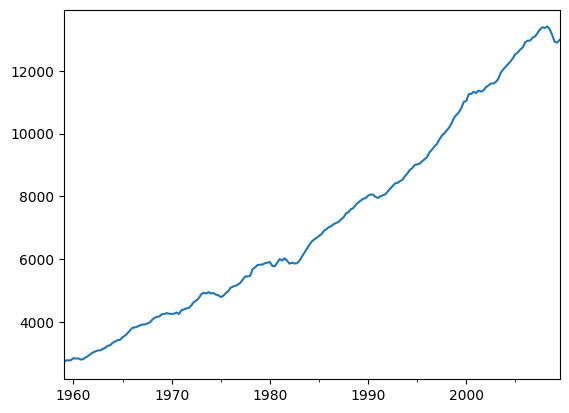

In [3]:
df['realgdp'].plot()

In [6]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [7]:
type(gdp_trend)

pandas.core.series.Series

<Axes: >

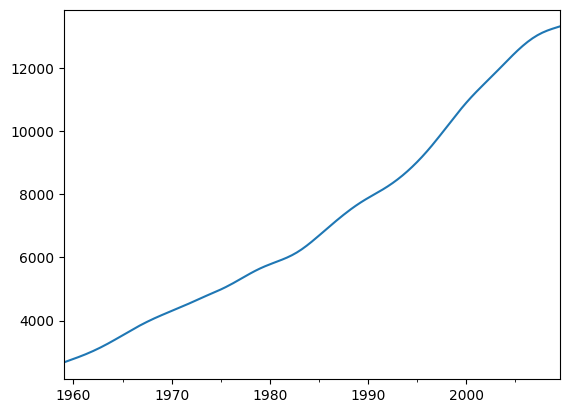

In [8]:
gdp_trend.plot()

In [9]:
df['trend'] = gdp_trend

<Axes: >

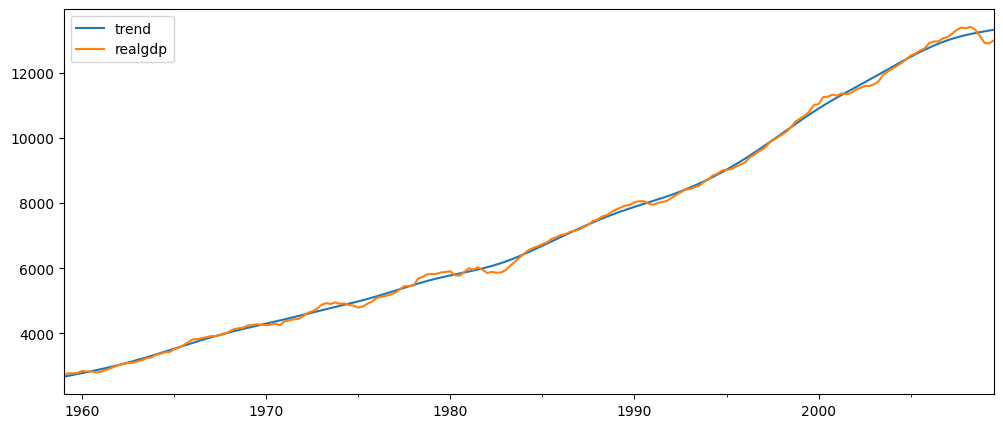

In [11]:
df[['trend','realgdp']].plot(figsize=(12,5))

<Axes: >

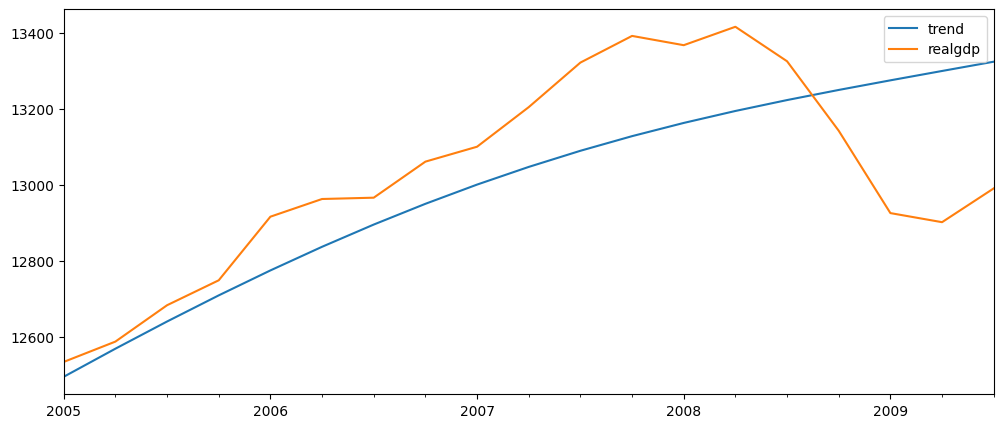

In [13]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

## ETS

In [14]:
airline = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

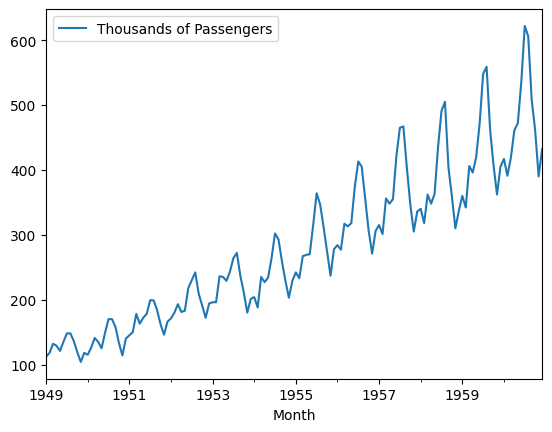

In [15]:
airline = airline.dropna()
airline.plot()

In [17]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

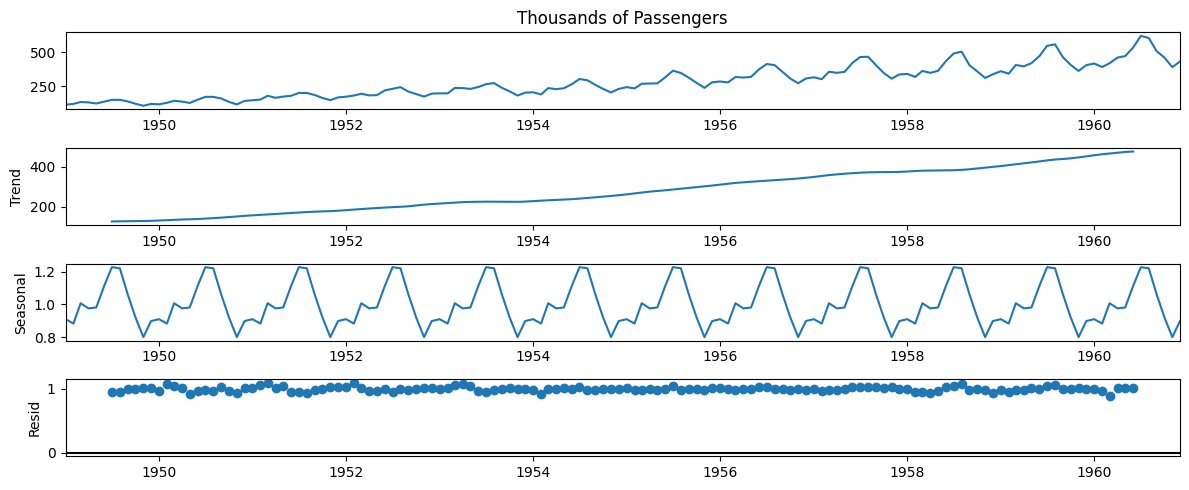

In [22]:
result.plot();

## EWMA